# Breast Cancer - Prediction

According to the WHO, breast cancer is the most commonly occurring cancer worldwide. In 2020 alone, there were 2.3 million new breast cancer diagnoses and 685,000 deaths. Yet breast cancer mortality in high-income countries has dropped by 40% since the 1980s when health authorities implemented regular mammography screening in age groups considered at risk. Early detection and treatment are critical to reducing cancer fatalities, and your machine learning skills could help streamline the process radiologists use to evaluate screening mammograms.

**Objective**: To create a predictive model that can accurately classify breastcancer cases as benign or malignant based on a set of relevant features. By leveraginghistorical data and applying machine learning techniques, we aim to develop a reliable tool forassisting medical professionals in diagnosing breast cancer

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc

## Read the data

In [3]:
data=pd.read_csv("C:/Users/user/Desktop/data.csv")
data

,id,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   Radius_mean              569 non-null    float64
 3   Texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Exploratory Data Analysis On Target Variable

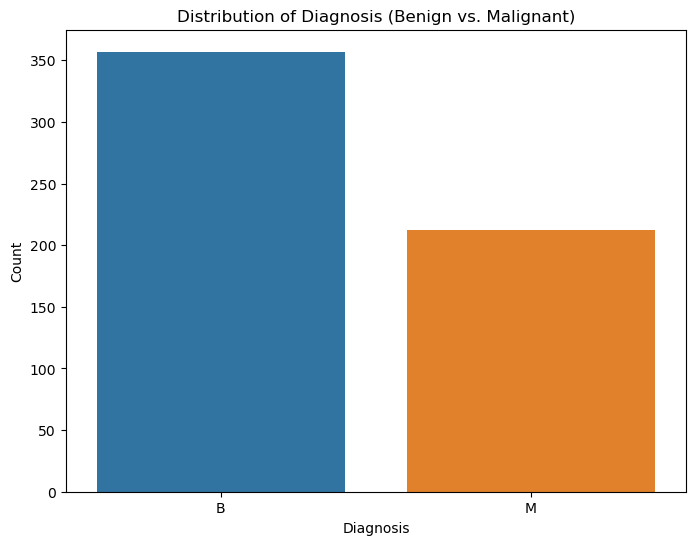

In [5]:
diagnosis_counts = data['diagnosis'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=diagnosis_counts.index, y=diagnosis_counts.values)
plt.title('Distribution of Diagnosis (Benign vs. Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_5588\2835754387.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


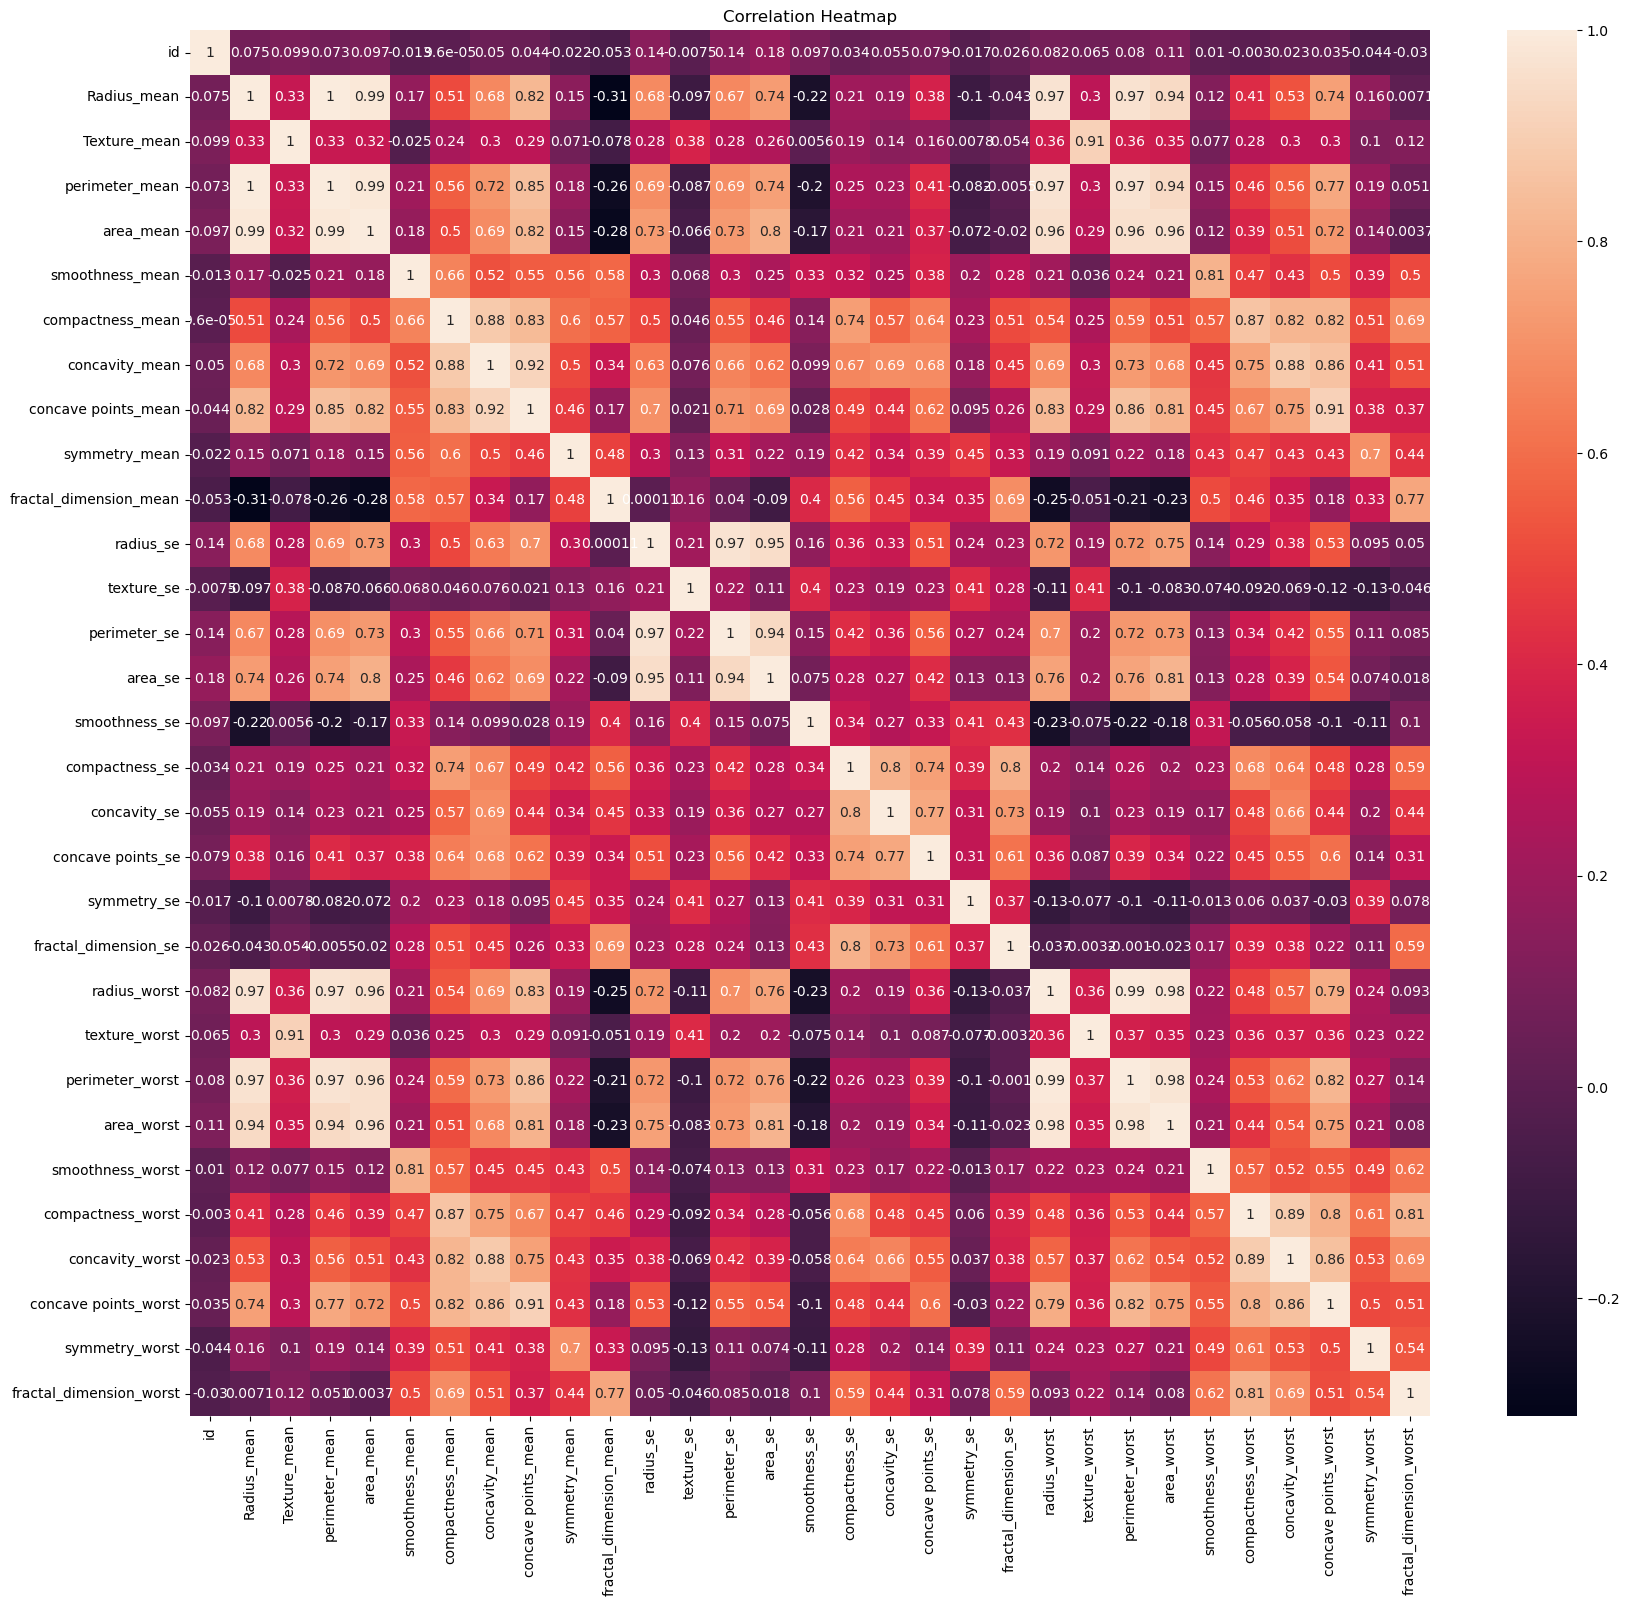

In [6]:
correlation_matrix = data.corr()
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, )
plt.title('Correlation Heatmap')
plt.show()

In [7]:
diagnosis_groups = data.groupby('diagnosis').describe()

In [8]:
diagnosis_groups 

id                                                          \
           count          mean           std     min       25%       50%   
diagnosis                                                                  
B          357.0  2.654382e+07  1.167397e+08  8913.0  874662.0  908916.0   
M          212.0  3.681805e+07  1.378965e+08  8670.0  861345.0  895366.5   

                                   Radius_mean             ... symmetry_worst  \
                  75%          max       count       mean  ...            75%   
diagnosis                                                  ...                  
B          8812816.00  911320502.0       357.0  12.146524  ...       0.298300   
M          8911289.75  911296202.0       212.0  17.462830  ...       0.359225   

                  fractal_dimension_worst                               \
              max                   count      mean       std      min   
diagnosis                                                                
B          0.4228                   357.0  0.079442  0.013804  0.05521   
M          0.6638                   212.0  0.091530  0.021553  0.05504   

                                                
                25%      50%       75%     max  
diagnosis                                       
B          0.070090  0.07712  0.085410  0.1486  
M          0.076302  0.08760  0.102625  0.2075  

[2 rows x 248 columns]

In [9]:
data['diagnosis']=pd.get_dummies(data['diagnosis'],drop_first=True)
import pandas as pd
correlation_matrix = data.corr()
diagnosis_correlation = correlation_matrix['diagnosis'].drop('diagnosis')  
diagnosis_correlation = diagnosis_correlation.abs().sort_values(ascending=False)
print(diagnosis_correlation)

concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
Radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
Texture_mean               0.417232
symmetry_worst             0.416294
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
smoothness_se              0.067016
id                         0

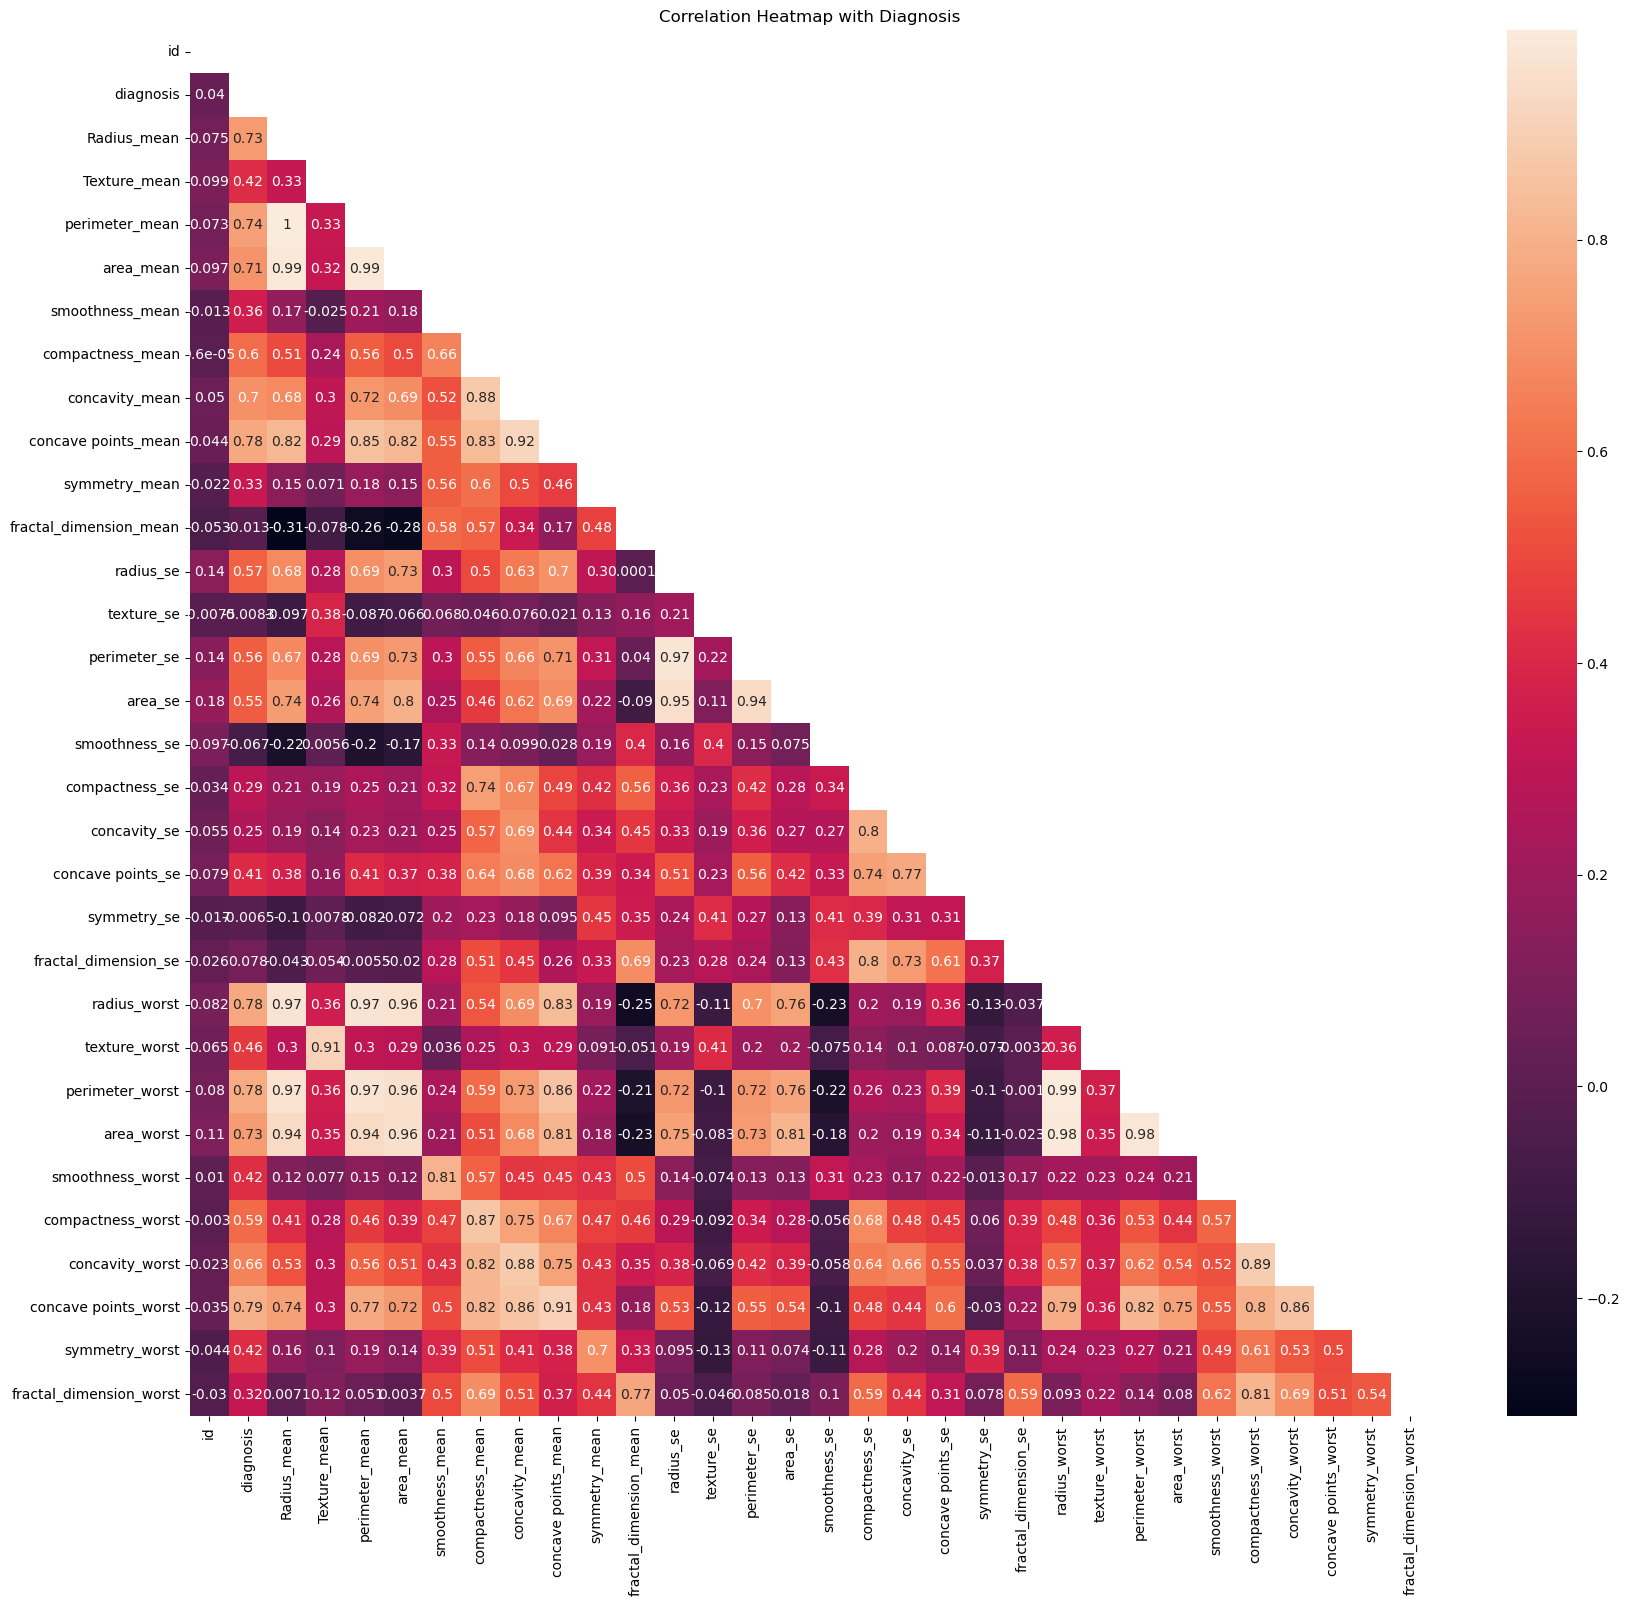

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = data.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True,mask=mask)
plt.title('Correlation Heatmap with Diagnosis')
plt.show()

In [11]:
data.corr()['diagnosis'].sort_values(ascending=False)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
Radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
Texture_mean               0.417232
symmetry_worst             0.416294
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
id                         0

In [12]:
import pandas as pd
correlation_matrix = data.corr()
diagnosis_correlation = correlation_matrix['diagnosis'].drop('diagnosis')  
least_correlated_variables = diagnosis_correlation.abs().nsmallest(14).index
data = data.drop(columns=least_correlated_variables)
print(data.head())

   diagnosis  Radius_mean  perimeter_mean  area_mean  compactness_mean  \
0          1        17.99          122.80     1001.0           0.27760   
1          1        20.57          132.90     1326.0           0.07864   
2          1        19.69          130.00     1203.0           0.15990   
3          1        11.42           77.58      386.1           0.28390   
4          1        20.29          135.10     1297.0           0.13280   

   concavity_mean  concave points_mean  radius_se  perimeter_se  area_se  \
0          0.3001              0.14710     1.0950         8.589   153.40   
1          0.0869              0.07017     0.5435         3.398    74.08   
2          0.1974              0.12790     0.7456         4.585    94.03   
3          0.2414              0.10520     0.4956         3.445    27.23   
4          0.1980              0.10430     0.7572         5.438    94.44   

   radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0         25.38  

In [13]:
data.corr()['diagnosis'].sort_values(ascending=False)

diagnosis               1.000000
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
Radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
concavity_worst         0.659610
compactness_mean        0.596534
compactness_worst       0.590998
radius_se               0.567134
perimeter_se            0.556141
area_se                 0.548236
texture_worst           0.456903
smoothness_worst        0.421465
Name: diagnosis, dtype: float64

In [15]:
data

,diagnosis,Radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst
0,1,17.99,122.80,1001.0,0.27760,0.30010,0.14710,1.0950,8.589,153.40,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654
1,1,20.57,132.90,1326.0,0.07864,0.08690,0.07017,0.5435,3.398,74.08,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860
2,1,19.69,130.00,1203.0,0.15990,0.19740,0.12790,0.7456,4.585,94.03,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430
3,1,11.42,77.58,386.1,0.28390,0.24140,0.10520,0.4956,3.445,27.23,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575
4,1,20.29,135.10,1297.0,0.13280,0.19800,0.10430,0.7572,5.438,94.44,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,142.00,1479.0,0.11590,0.24390,0.13890,1.1760,7.673,158.70,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216
565,1,20.13,131.20,1261.0,0.10340,0.14400,0.09791,0.7655,5.203,99.04,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628
566,1,16.60,108.30,858.1,0.10230,0.09251,0.05302,0.4564,3.425,48.55,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418
567,1,20.60,140.10,1265.0,0.27700,0.35140,0.15200,0.7260,5.772,86.22,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650


## Standerd Scaling And Principle Component Analysis

In [16]:
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X)
X_test = scaler.transform(X)

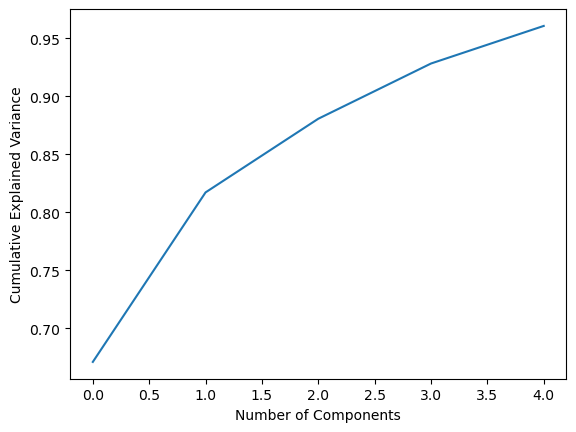

In [18]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_test)
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance.cumsum()

import matplotlib.pyplot as plt
plt.plot(cumulative_explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

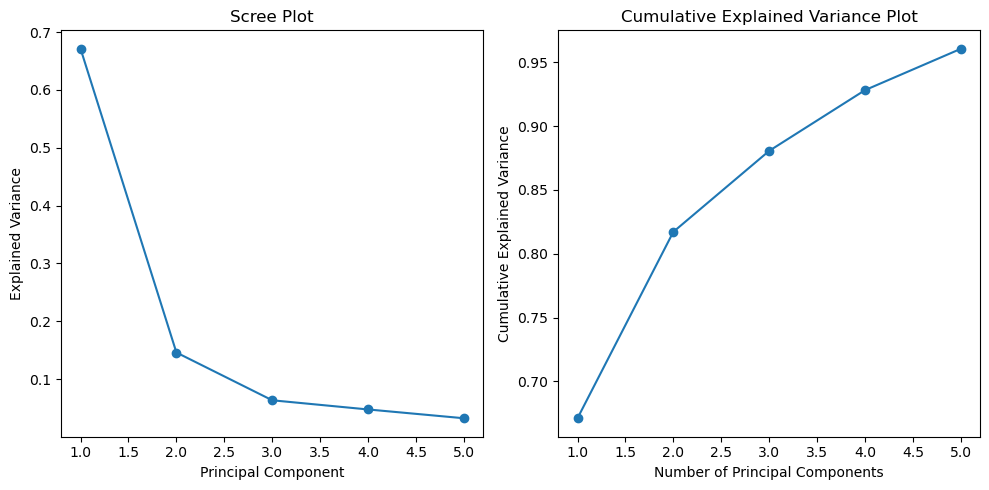

In [19]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')

plt.tight_layout()
plt.show()

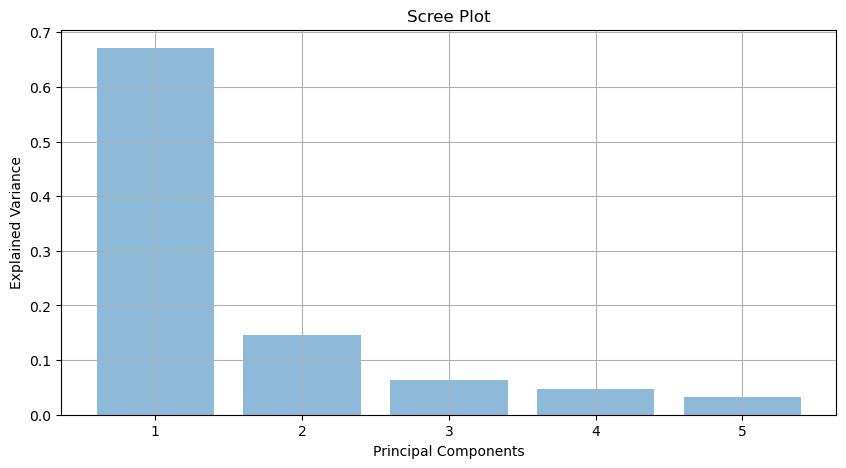

   Principal Component  Explained Variance
0                    1            0.671096
1                    2            0.146053
2                    3            0.063456
3                    4            0.047587
4                    5            0.032387


In [20]:
pca.fit(X_test)
explained_variance = pca.explained_variance_ratio_


plt.figure(figsize=(10, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.grid()
plt.show()


explained_variance_table = pd.DataFrame({'Principal Component': range(1, len(explained_variance) + 1),'Explained Variance': explained_variance})
print(explained_variance_table)

In [21]:
pca_data=pd.DataFrame(data=X_pca,columns=[f'PC{i+1}' for i in range(5)])
pca_data

,PC1,PC2,PC3,PC4,PC5
0,8.202325,-1.307160,3.076591,-1.009067,0.258197
1,3.400960,2.421820,-1.479582,-1.261539,-0.747585
2,5.384551,0.041774,-0.006707,-0.795671,-0.213869
3,3.054880,-6.336045,1.975767,0.092630,-0.343438
4,4.411467,1.622418,0.778984,-1.712589,-0.426528
...,...,...,...,...,...
564,6.958879,2.462185,1.032061,0.107700,-0.593492
565,4.340754,2.145133,-1.298502,1.232456,0.290349
566,1.466189,0.542494,-1.217979,0.728908,0.802506
567,8.846619,-3.412932,-0.571828,0.538842,1.275512


## Train Test Split 

In [22]:
X_train,X_test,y_train,y_test=train_test_split(pca_data,y,test_size=0.20,random_state=44)

## Fitting With Various Machine Learning Model

In [23]:
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "K-NN": KNeighborsClassifier(),
    "SVC": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression()
}

for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")

Random Forest Accuracy: 0.9736842105263158
K-NN Accuracy: 0.9824561403508771
SVC Accuracy: 0.9824561403508771
Decision Tree Accuracy: 0.9385964912280702
Logistic Regression Accuracy: 0.9824561403508771


## Model Comparison

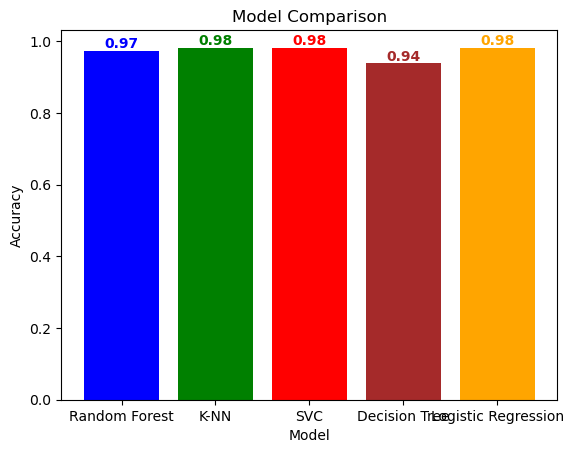

In [24]:
models = ["Random Forest", "K-NN","SVC", "Decision Tree", "Logistic Regression"]
accuracies = [accuracy_score(y_test, classifiers[model].predict(X_test)) for model in models]
colors = ['blue', 'green', 'red','brown','orange']

fig, ax = plt.subplots()
bars = plt.bar(models, accuracies, color=colors)

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
for bar, accuracy, color in zip(bars, accuracies, colors):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{accuracy:.2f}', ha='center', va='bottom', color=color, fontsize=10, weight='bold')

plt.show()

## Hyperparameter Tuning

In [25]:
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}



grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)



best_model = grid_search.best_estimator_

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

## Model Evaluation

In [26]:
y_pred = best_model.predict(X_test)
print("Best Model Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Model Accuracy: 0.9824561403508771
Confusion Matrix:
 [[74  1]
 [ 1 38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        75
           1       0.97      0.97      0.97        39

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [27]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tabulate import tabulate

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
data = {
    "Metric": ["Accuracy", "Precision (0)", "Precision (1)", "Recall (0)", "Recall (1)", "F1-Score (0)", "F1-Score (1)"],
    "Value": [accuracy, report['0']['precision'], report['1']['precision'],
              report['0']['recall'], report['1']['recall'],
              report['0']['f1-score'], report['1']['f1-score']]
}

result_table = pd.DataFrame(data)
table = tabulate(result_table, headers='keys', tablefmt='fancy_grid', showindex=False, numalign="right", stralign='center')
print(table)

╒═══════════════╤══════════╕
│    Metric     │    Value │
╞═══════════════╪══════════╡
│   Accuracy    │ 0.982456 │
├───────────────┼──────────┤
│ Precision (0) │ 0.986667 │
├───────────────┼──────────┤
│ Precision (1) │ 0.974359 │
├───────────────┼──────────┤
│  Recall (0)   │ 0.986667 │
├───────────────┼──────────┤
│  Recall (1)   │ 0.974359 │
├───────────────┼──────────┤
│ F1-Score (0)  │ 0.986667 │
├───────────────┼──────────┤
│ F1-Score (1)  │ 0.974359 │
╘═══════════════╧══════════╛


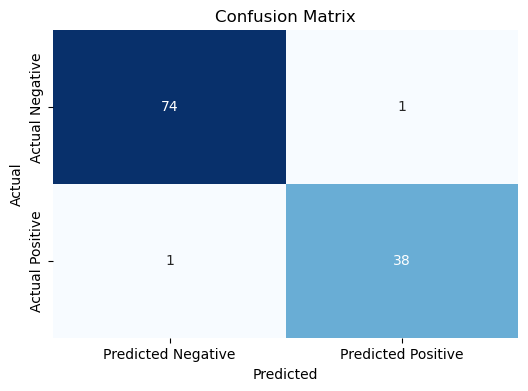

In [28]:
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

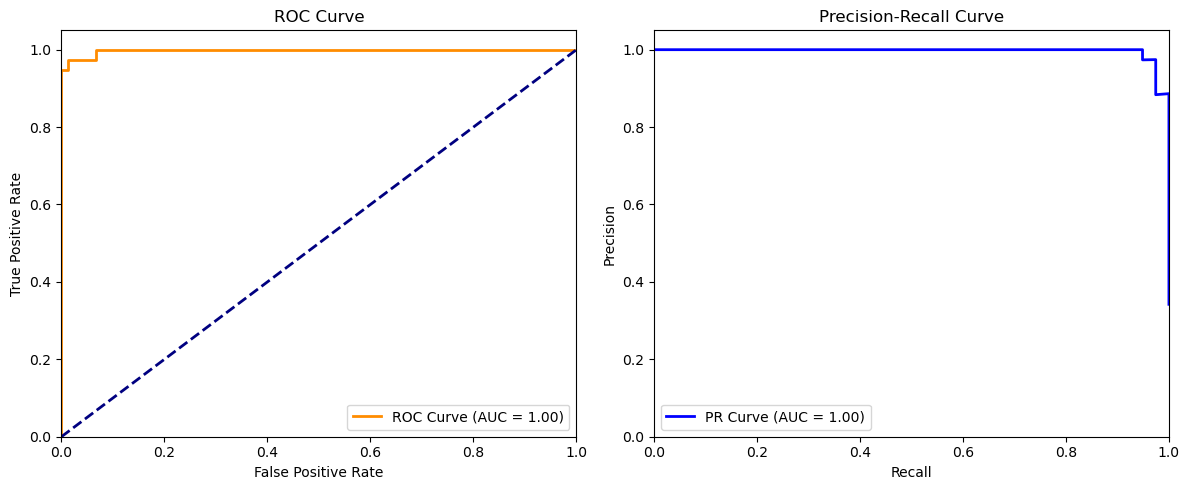

In [29]:
best_model.fit(X_train, y_train)
y_scores = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)


precision, recall, _ = precision_recall_curve(y_test, y_scores)
pr_auc = auc(recall, precision)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label=f'PR Curve (AUC = {pr_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

**High Accuracy:** A high accuracy score indicates that the model is good at correctly classifying tumors. This means that the model can be a valuable tool in identifying malignant tumors, potentially leading to early diagnosis and timely treatment.

**High Recall:** High recall means the model is good at identifying malignant cases, reducing the chances of false negatives. This can be crucial in the context of cancer prediction, as missing a malignant tumor can have serious consequences.

logistic regression for breast cancer prediction provides a practical and interpretable approach to classifying tumors. It offers insights into the factors that influence the prediction, helps minimize false negatives, and can play a valuable role in early diagnosis and improved patient outcomes.

## Conclusion

In conclusion, the logistic regression model we have developed exhibits strong diagnostic capabilities for breast cancer classification. Its high accuracy, precision, and recall, combined with its interpretability, make it a promising candidate for aiding healthcare professionals in breast cancer diagnosis.

The results we obtained were highly promising. With a mean accuracy of 97.72% and a standard deviation of 1.19%, the logistic regression model demonstrated exceptional consistency and reliability. This underscores its potential as a valuable tool for medical professionals.

Moreover, our model achieved a precision of 98.41% and a recall of 98.41%. This balanced combination of precision and recall is pivotal in the context of breast cancer diagnosis, where the consequences of both false positives and false negatives can be significant. It means that our logistic regression model excels at minimizing both types of errors, making it a well-rounded and effective diagnostic tool.